norm_method: none
norm_method: explin
norm_method: upbounded
norm_method: downbounded
norm_method: bounded


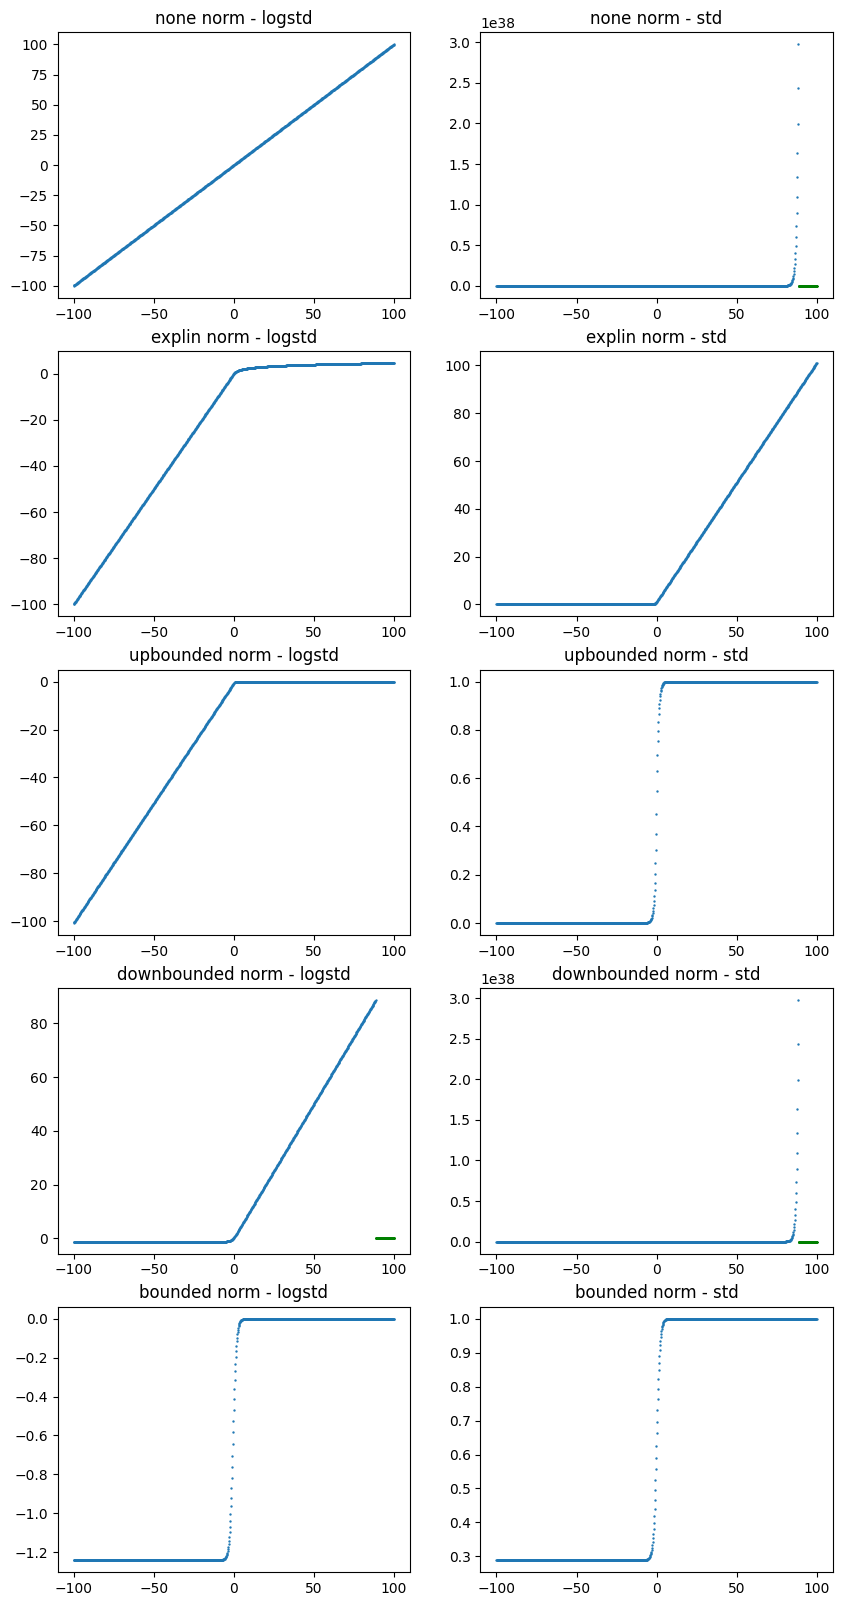

In [4]:
%reload_ext autoreload
%autoreload 2
from utils.vae_utils import _norm_raw_logstd
import matplotlib.pyplot as plt
import torch
import numpy as np

# raw_logstd_range = torch.concat([torch.logspace(0, 3, 20), -torch.logspace(0, 3, 20)])
raw_logstd_range = torch.linspace(-100, 100, 1000)

# explore norms for different norm methods
# plot logstd and std side by side for each method

fig, axs = plt.subplots(5, 2, figsize=(10, 20))
for norm_method, _axs in zip(["none", "explin", "upbounded", "downbounded", "bounded"], axs):
    print(f"norm_method: {norm_method}")
    norm_std_bound_min, norm_std_bound_max = None, None
    if norm_method == "upbounded" or norm_method == "bounded":
        norm_std_bound_max = 1.0
    if norm_method == "downbounded" or norm_method == "bounded":
        norm_std_bound_min = 1.0 / np.sqrt(12)  # 1/sqrt(12) is the std of a uniform distribution

    normed_logstd, normed_std = _norm_raw_logstd(
        raw_logstd_range,
        logstd_norm_method=norm_method if norm_method in ["explin", "none"] else "bounded",
        norm_std_bound_min=norm_std_bound_min,
        norm_std_bound_max=norm_std_bound_max,
    )

    nan_logstd_mask = normed_logstd.isnan()
    inf_logstd_mask = normed_logstd.isinf()
    nan_std_mask = normed_std.isnan()
    inf_std_mask = normed_std.isinf()

    good_logstd_mask = ~nan_logstd_mask & ~inf_logstd_mask
    good_std_mask = ~nan_std_mask & ~inf_std_mask

    normed_logstd[~good_logstd_mask] = 0
    normed_std[~good_std_mask] = 0

    _axs[0].scatter(raw_logstd_range[good_logstd_mask], normed_logstd[good_logstd_mask], marker="o", s=0.5)
    _axs[0].scatter(raw_logstd_range[nan_logstd_mask], normed_logstd[nan_logstd_mask], c="red", marker="*", s=1)
    _axs[0].scatter(raw_logstd_range[inf_logstd_mask], normed_logstd[inf_logstd_mask], c="green", marker="*",s=1)
    _axs[0].set_title(norm_method + " norm - logstd")

    _axs[1].scatter(raw_logstd_range[good_std_mask], normed_std[good_std_mask], marker="o", s=0.5)
    _axs[1].scatter(raw_logstd_range[nan_std_mask], normed_std[nan_std_mask], c="red", marker="*", s=1)
    _axs[1].scatter(raw_logstd_range[inf_std_mask], normed_std[inf_std_mask], c="green", marker="*", s=1)
    _axs[1].set_title(norm_method + " norm - std")


plt.show()

norm_method: none
norm_method: explin
norm_method: upbounded
norm_method: downbounded
norm_method: bounded


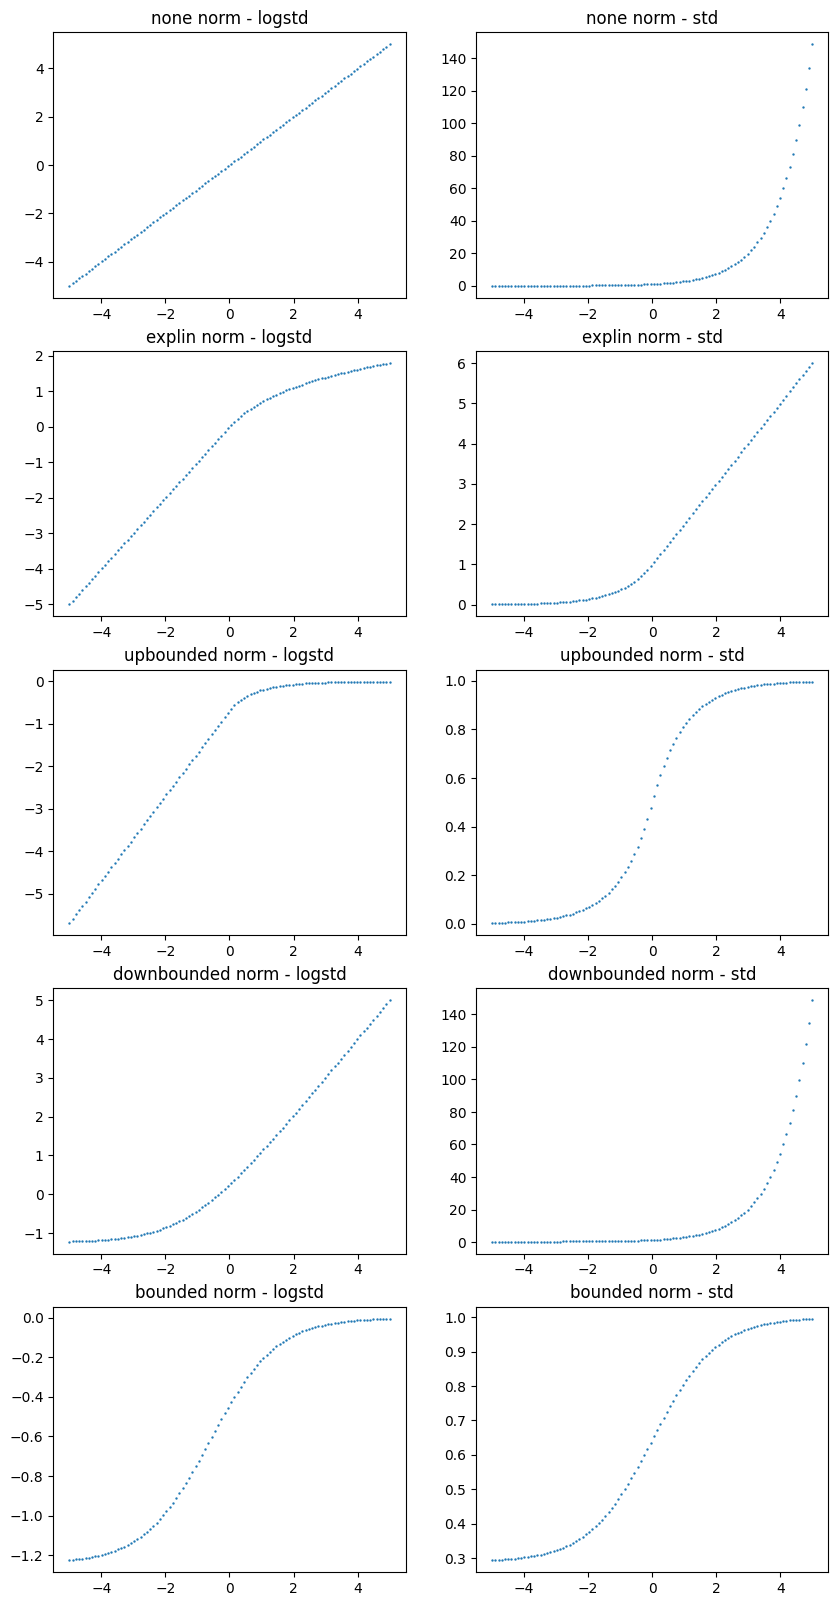

In [9]:

raw_logstd_range = torch.linspace(-5, 5, 100)

# explore norms for different norm methods
# plot logstd and std side by side for each method

fig, axs = plt.subplots(5, 2, figsize=(10, 20))
for norm_method, _axs in zip(["none", "explin", "upbounded", "downbounded", "bounded"], axs):
    print(f"norm_method: {norm_method}")
    norm_std_bound_min, norm_std_bound_max = None, None
    if norm_method == "upbounded" or norm_method == "bounded":
        norm_std_bound_max = 1.0
    if norm_method == "downbounded" or norm_method == "bounded":
        norm_std_bound_min = 1.0 / np.sqrt(12)  # 1/sqrt(12) is the std of a uniform distribution

    normed_logstd, normed_std = _norm_raw_logstd(
        raw_logstd_range,
        logstd_norm_method=norm_method if norm_method in ["explin", "none"] else "bounded",
        norm_std_bound_min=norm_std_bound_min,
        norm_std_bound_max=norm_std_bound_max,
    )

    nan_logstd_mask = normed_logstd.isnan()
    inf_logstd_mask = normed_logstd.isinf()
    nan_std_mask = normed_std.isnan()
    inf_std_mask = normed_std.isinf()

    good_logstd_mask = ~nan_logstd_mask & ~inf_logstd_mask
    good_std_mask = ~nan_std_mask & ~inf_std_mask

    normed_logstd[~good_logstd_mask] = 0
    normed_std[~good_std_mask] = 0

    _axs[0].scatter(raw_logstd_range[good_logstd_mask], normed_logstd[good_logstd_mask], marker="o", s=0.5)
    _axs[0].scatter(raw_logstd_range[nan_logstd_mask], normed_logstd[nan_logstd_mask], c="red", marker="*", s=1)
    _axs[0].scatter(raw_logstd_range[inf_logstd_mask], normed_logstd[inf_logstd_mask], c="green", marker="*",s=1)
    _axs[0].set_title(norm_method + " norm - logstd")

    _axs[1].scatter(raw_logstd_range[good_std_mask], normed_std[good_std_mask], marker="o", s=0.5)
    _axs[1].scatter(raw_logstd_range[nan_std_mask], normed_std[nan_std_mask], c="red", marker="*", s=1)
    _axs[1].scatter(raw_logstd_range[inf_std_mask], normed_std[inf_std_mask], c="green", marker="*", s=1)
    _axs[1].set_title(norm_method + " norm - std")


plt.show()